<a href="https://colab.research.google.com/github/azdinelaaouissi/Pfa/blob/main/dl_form5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%config Completer.use_jedi = False

In [ ]:
import  pandas  as  pd
import  numpy  as  np
import  matplotlib.pyplot  as  plt
import  seaborn  as  sns
from  sklearn.metrics  import  *
from  tensorflow.keras.models  import  Sequential
from  tensorflow.keras.layers  import  Dense,Dropout,Conv2D,MaxPool2D,Flatten
from  tensorflow.keras.datasets  import  cifar10
from  tensorflow.keras.utils  import  to_categorical
from  tensorflow.keras.callbacks  import  EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

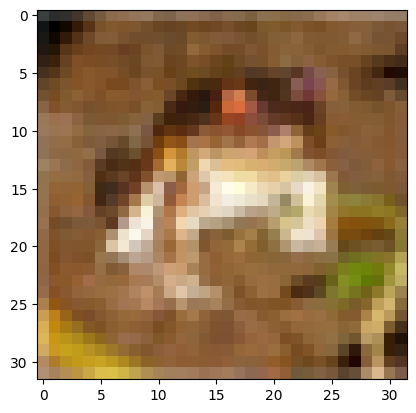

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
y_cat_train=to_categorical(y_train)
y_cat_test=to_categorical(y_test)

In [ ]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
x_train = x_train.reshape(50000, 32, 32, 3)
x_test = x_test.reshape(10000, 32, 32, 3)

In [ ]:

# Couche convolutive
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


# Couche convolutive
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


# Couche Flatten
model.add(Flatten())

# Couche Dense
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
  72/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1731 - loss: 2.2144

W0000 00:00:1722806280.636991     499 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3859 - loss: 1.6847

W0000 00:00:1722806285.548515     501 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3859 - loss: 1.6845 - val_accuracy: 0.5350 - val_loss: 1.2836
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5732 - loss: 1.2093 - val_accuracy: 0.5932 - val_loss: 1.1724
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6335 - loss: 1.0411 - val_accuracy: 0.6454 - val_loss: 1.0167
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6786 - loss: 0.9234 - val_accuracy: 0.6362 - val_loss: 1.0346
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7121 - loss: 0.8211 - val_accuracy: 0.6611 - val_loss: 0.9622
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7405 - loss: 0.7450 - val_accuracy: 0.6768 - val_loss: 0.9392
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7669 - loss: 0.6659 - val_accuracy: 0.6679 - val_loss: 0.9849
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7868 - loss: 0.6004 - val_accurac

<Axes: >

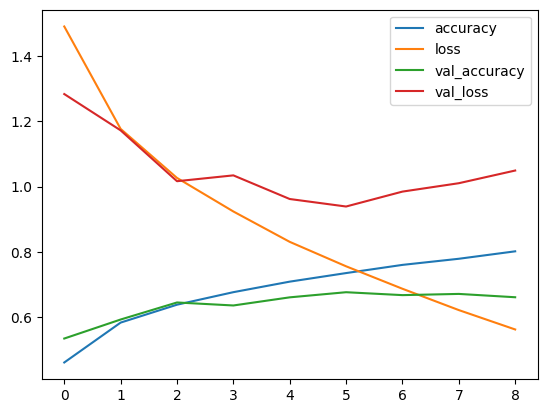

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
ypred=np.argmax(model.predict(x_test),axis=1)

107/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

W0000 00:00:1722806342.090397     502 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
ypred

array([3, 8, 8, ..., 5, 4, 7])

In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70      1000
           1       0.82      0.76      0.79      1000
           2       0.56      0.59      0.57      1000
           3       0.43      0.52      0.47      1000
           4       0.65      0.53      0.59      1000
           5       0.53      0.55      0.54      1000
           6       0.81      0.67      0.73      1000
           7       0.75      0.70      0.73      1000
           8       0.75      0.79      0.77      1000
           9       0.78      0.74      0.76      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



<Axes: >

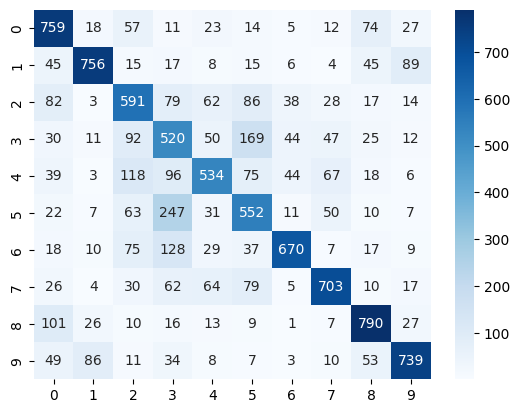

In [ ]:
sns.heatmap(confusion_matrix(y_test,ypred),
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=range(10),
            yticklabels=range(10))
